**Afshin Bayatpour, email: afshin.bayatpour@gmail.com**

# Project Objectives

1. Create a graph showing the number of Netflix shows/movies produced per country 
2. Create a graph of the number of new shows/documentaries released per month.
3. List out the 3 directors that had directed the most amount of movies.
4. Predecting the rating of the selected Movie / TV show Using ML approaches

## imports

In [1]:
import pandas as pd
import numpy as np
from itertools import chain
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn import preprocessing

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics



In [2]:
netflix_data = pd.read_csv(r"D:\Bootcamp\Project_1\netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## data exploring

In [3]:
netflix_data.rating.unique()


array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [4]:
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
rating_prediction =  netflix_data[["director", "type", "release_year", "rating"]]
rating_prediction

,director,type,release_year,rating
0,NaN,TV Show,2020,TV-MA
1,Jorge Michel Grau,Movie,2016,TV-MA
2,Gilbert Chan,Movie,2011,R
3,Shane Acker,Movie,2009,PG-13
4,Robert Luketic,Movie,2008,PG-13
...,...,...,...,...
7782,Josef Fares,Movie,2005,TV-MA
7783,Mozez Singh,Movie,2015,TV-14
7784,NaN,Movie,2019,TV-MA
7785,NaN,TV Show,2019,TV-PG


In [6]:
rating_prediction.dropna(subset = ["director", "rating"], inplace=True)

<ipython-input-6-e60f8e634035>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_prediction.dropna(subset = ["director", "rating"], inplace=True)


In [7]:
rating_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5394 entries, 1 to 7786
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   director      5394 non-null   object
 1   type          5394 non-null   object
 2   release_year  5394 non-null   int64 
 3   rating        5394 non-null   object
dtypes: int64(1), object(3)
memory usage: 210.7+ KB


 ## 1.Create a graph showing the number of Netflix shows/movies produced per country 


In [8]:
netflix_data.dropna(subset = ["country", "type", "date_added"], inplace=True)
# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))

# calculate lengths of splits
lens = netflix_data['country'].str.split(',').map(len)

# create new dataframe, repeating or chaining as appropriate
res = pd.DataFrame({'show_id': np.repeat(netflix_data['show_id'], lens),
                    'type': np.repeat(netflix_data['type'], lens),
                    'country': chainer(netflix_data['country'])})

In [9]:
res.head()

,show_id,type,country
0,s1,TV Show,Brazil
1,s2,Movie,Mexico
2,s3,Movie,Singapore
3,s4,Movie,United States
4,s5,Movie,United States


Text(0.5, 1.0, 'Number of Netflix shows/movies produced per country')

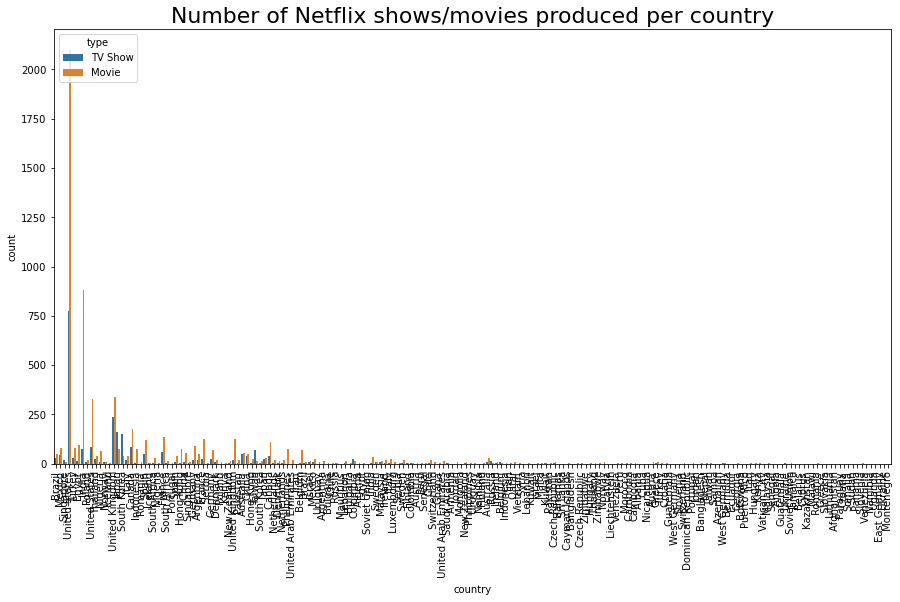

In [10]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data=res,x='country',hue='type')
plt.xticks(rotation=90)
ax.set_title("Number of Netflix shows/movies produced per country", fontsize=22)


## 2. Create a graph of the number of new shows/documentaries released per month.


In [11]:
netflix_data.date_added.dtype

dtype('O')

In [12]:
netflix_data.date_added

0         August 14, 2020
1       December 23, 2016
2       December 20, 2018
3       November 16, 2017
4         January 1, 2020
              ...        
7781     January 11, 2020
7782     October 19, 2020
7783        March 2, 2019
7785     October 31, 2020
7786        March 1, 2020
Name: date_added, Length: 7271, dtype: object

In [13]:
df = netflix_data.date_added.apply(lambda x: x.strip()) # to remove extra spaces in the string
date = df.apply(lambda s: datetime.strptime(s, '%B %d, %Y').strftime('%Y-%m-%d')) # changing the format of time to be able to extract the month

In [14]:
netflix_data["date_added"] = date
pd.to_datetime(netflix_data["date_added"])

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7781   2020-01-11
7782   2020-10-19
7783   2019-03-02
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7271, dtype: datetime64[ns]

In [15]:
netflix_data['month'] = pd.DatetimeIndex(netflix_data['date_added']).month
netflix_data['year'] = pd.DatetimeIndex(netflix_data['date_added']).year

netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020


In [16]:
netflix_data["is_show _or_documentary"] = netflix_data["listed_in"].apply(lambda x: 1 if ('TV Shows' in x or "Documentaries" in x) else 0)
df_show_or_documentary = netflix_data.loc[netflix_data["is_show _or_documentary"] == 1]
df_show_or_documentary.shape
df_show_or_documentary.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year,is_show _or_documentary
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020,1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,7,2017,1
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",11,2018,1
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,5,2019,1
13,s14,Movie,"2,215",Nottapon Boonprakob,Artiwara Kongmalai,Thailand,2019-03-01,2018,TV-MA,89 min,"Documentaries, International Movies, Sports Mo...",This intimate documentary follows rock star Ar...,3,2019,1


In [17]:
df2_show_or_documentary = df_show_or_documentary.groupby(["year", "month"]).count()
df2_show_or_documentary

show_id  type  title  director  cast  country  date_added  \
year month                                                              
2012 2            1     1      1         1     1        1           1   
2013 3            1     1      1         1     1        1           1   
     8            1     1      1         0     1        1           1   
     10           1     1      1         0     1        1           1   
     12           1     1      1         1     1        1           1   
...             ...   ...    ...       ...   ...      ...         ...   
2020 9           46    46     46        17    36       46          46   
     10          45    45     45        24    35       45          45   
     11          32    32     32         9    25       32          32   
     12          44    44     44         9    35       44          44   
2021 1           16    16     16         8    14       16          16   

            release_year  rating  duration  listed_in  description  \
year month                                                           
2012 2                 1       1         1          1            1   
2013 3                 1       1         1          1            1   
     8                 1       1         1          1            1   
     10                1       1         1          1            1   
     12                1       1         1          1            1   
...                  ...     ...       ...        ...          ...   
2020 9                46      46        46         46           46   
     10               45      45        45         45           45   
     11               32      32        32         32           32   
     12               44      44        44         44           44   
2021 1                16      16        16         16           16   

            is_show _or_documentary  
year month                           
2012 2                            1  
2013 3                            1  
     8                            1  
     10                           1  
     12                           1  
...                             ...  
2020 9                           46  
     10                          45  
     11                          32  
     12                          44  
2021 1                           16  

[82 rows x 13 columns]

Text(0.5, 1.0, 'Number of new shows/documentaries released per month')

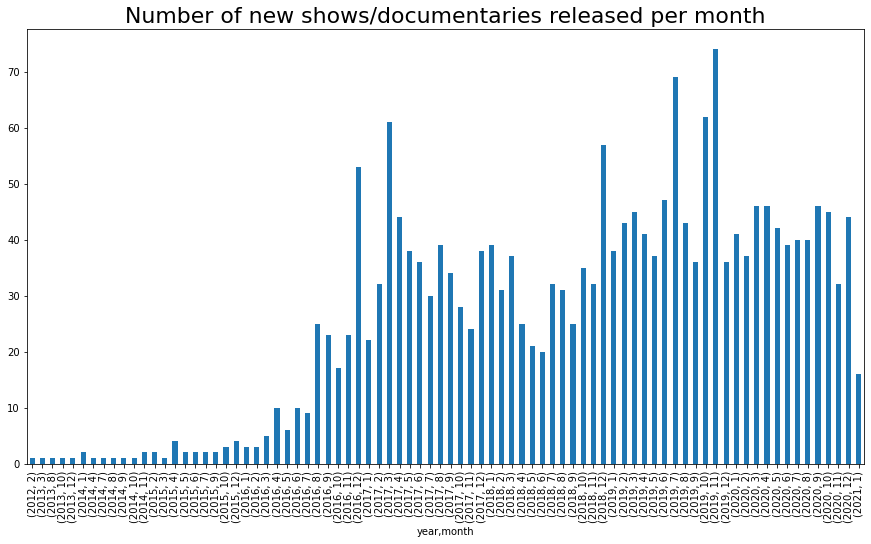

In [18]:
plt.figure(figsize=(15,8))
ax = df2_show_or_documentary["is_show _or_documentary"].plot.bar()
plt.xticks(rotation=90)
ax.set_title("Number of new shows/documentaries released per month", fontsize=22)

## 3. List out the 3 directors that had directed the most amount of movies.

In [19]:
netflix_data.dropna(subset = ["director"], inplace=True)

In [20]:
netflix_data.shape

(5193, 15)

In [21]:
lens1 = netflix_data['director'].str.split(',').map(len)
lens1.sum() 

5891

This means we have some movies that have more than one director!

In [22]:
# create new dataframe, repeating or chaining as appropriate
res2 = pd.DataFrame({'show_id': np.repeat(netflix_data['show_id'], lens1),
                     'director': chainer(netflix_data['director'])})

In [23]:
res2

,show_id,director
1,s2,Jorge Michel Grau
2,s3,Gilbert Chan
3,s4,Shane Acker
4,s5,Robert Luketic
5,s6,Serdar Akar
...,...,...
7780,s7781,Shlok Sharma
7781,s7782,Peter Hewitt
7782,s7783,Josef Fares
7783,s7784,Mozez Singh


In [24]:
res3 = res2.groupby(["director"]).count().sort_values(by=['show_id'], ascending=False)
res3

,show_id
director,
Jan Suter,18
Raúl Campos,18
Marcus Raboy,15
Jay Karas,15
Cathy Garcia-Molina,13
...,...
Hussein El Ansary,1
Huw Cordey,1
Hèctor Hernández Vicens,1


In [25]:
top_3_directors = res3.iloc[0:3,0]
top_3_directors

director
 Jan Suter      18
Raúl Campos     18
Marcus Raboy    15
Name: show_id, dtype: int64

## 4. Predecting the rating of the selected Movie / TV show Using ML approaches

In [26]:
rating_prediction.groupby("rating").count()

,director,type,release_year
rating,,,
G,39,39,39
NC-17,2,2,2
NR,79,79,79
PG,247,247,247
PG-13,385,385,385
R,661,661,661
TV-14,1295,1295,1295
TV-G,106,106,106
TV-MA,1878,1878,1878


The y value is imbalanced

## data preprocessing

In [27]:
le = preprocessing.LabelEncoder()
for label in rating_prediction[["director", "type", "rating"]]:
    rating_prediction[label] = le.fit_transform(rating_prediction[label])  
rating_prediction.head()

<ipython-input-27-e5dd63439d38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_prediction[label] = le.fit_transform(rating_prediction[label])


,director,type,release_year,rating
1,1839,0,2016,8
2,1288,0,2011,5
3,3443,0,2009,4
4,3174,0,2008,4
5,3416,1,2016,8


In [28]:
X = rating_prediction[["director", "type", "release_year"]]
y = rating_prediction[["rating"]]



In [29]:
from sklearn.preprocessing import StandardScaler
def preprocessing(X,y):
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    #transfering in dataframe format
    scaled_data = pd.DataFrame(X_train_scaled)
    X_train_scaled = scaled_data.rename(columns={0: 'director', 1: "type", 2: "release_year"})

    scaled_data = pd.DataFrame(X_test_scaled)
    X_test_scaled = scaled_data.rename(columns={0: 'director', 1: "type", 2: "release_year"})
    
    return X_train_scaled, X_test_scaled, y_train, y_test

    

In [30]:
X_train,X_test,y_train,y_test = preprocessing(X,y)

In [31]:
def fit_model(model,X,y):
    model.fit(X,y)
    y_pred = model.predict(X_test)
    print("Accuracy: ",model.score(X_test,y_test))
    print("------------------------------")
    print("Classification Report")
    print("------------------------------")
    print(classification_report(y_test,y_pred))
    print("------------------------------")
    print("Confusion Matrix")
    print("------------------------------")
    print(confusion_matrix(y_test,y_pred))
    print("------------------------------")
    return y_pred

### approach 1 : predecting 14 classes with imbalanced data

### Logistic Regression 

In [32]:
lr = LogisticRegression(max_iter = 1000)

y_test_lr = fit_model(lr,X_train,y_train)

C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy:  0.386468952734013
------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        45
           4       0.00      0.00      0.00        71
           5       1.00      0.01      0.02       112
           6       0.31      0.21      0.25       277
           7       0.00      0.00      0.00        19
           8       0.40      0.95      0.57       375
           9       0.00      0.00      0.00       117
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00        17
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1

    accuracy                           0.39      1079
   macro avg       0.

C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [33]:
dtree = DecisionTreeClassifier()

y_test_dtree = fit_model(dtree,X_train,y_train)

Accuracy:  0.3113994439295644
------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.14      0.12      0.13         8
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        17
           3       0.08      0.09      0.09        45
           4       0.24      0.20      0.22        71
           5       0.17      0.19      0.18       112
           6       0.37      0.35      0.36       277
           7       0.11      0.16      0.13        19
           8       0.46      0.49      0.47       375
           9       0.10      0.09      0.09       117
          10       0.13      0.22      0.17        18
          11       0.00      0.00      0.00        17
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1

    accuracy                           0.31      1079
   macro avg       0

C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Verifying if filtering the dataframe based on Movie / TV show can result in more balanced data

In [34]:
prediction_2 =  netflix_data[["director", "type", "release_year", "rating"]]
rating_prediction_2 = prediction_2.loc[prediction_2['type'] == 'TV Show']
rating_prediction_2.groupby("rating").count()

,director,type,release_year
rating,,,
TV-14,43,43,43
TV-G,4,4,4
TV-MA,88,88,88
TV-PG,20,20,20
TV-Y,6,6,6
TV-Y7,8,8,8


In [35]:
rating_prediction_3 = netflix_data[["director", "type", "release_year", "rating"]]
rating_prediction_3 = rating_prediction_3.loc[rating_prediction_3['type'] == 'Movie']
rating_prediction_3.groupby("rating").count()

,director,type,release_year
rating,,,
G,39,39,39
NC-17,2,2,2
NR,79,79,79
PG,244,244,244
PG-13,382,382,382
R,659,659,659
TV-14,1195,1195,1195
TV-G,94,94,94
TV-MA,1719,1719,1719


##### we still have an imbalanced data.  we do not have enough data for all classes to achieve an acceptable evaluation metrics

### approach 2 :predicting if the selected move/tv show is in TV-14 class or not

In [36]:
rating_prediction_4 = netflix_data[["director", "type", "release_year", "rating"]]
rating_prediction_4.dropna(subset = ["director", "rating"], inplace=True)

rating_prediction_4

<ipython-input-36-1f1fd75b8af2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_prediction_4.dropna(subset = ["director", "rating"], inplace=True)


,director,type,release_year,rating
1,Jorge Michel Grau,Movie,2016,TV-MA
2,Gilbert Chan,Movie,2011,R
3,Shane Acker,Movie,2009,PG-13
4,Robert Luketic,Movie,2008,PG-13
5,Serdar Akar,TV Show,2016,TV-MA
...,...,...,...,...
7780,Shlok Sharma,Movie,2018,TV-MA
7781,Peter Hewitt,Movie,2006,PG
7782,Josef Fares,Movie,2005,TV-MA
7783,Mozez Singh,Movie,2015,TV-14


In [37]:
rating_prediction_4["rating"].replace({"G": "N", "NC-17": "N", "NR": "N","PG": "N","PG-13": "N","R": "N","TV-G": "N","TV-MA": "N"
                                       ,"TV-Y": "N","TV-Y7": "N","TV-Y7-FV": "N","UR": "N", "TV-PG": "N", "TV-14": "Y"}, inplace=True)


C:\Users\AfshIn\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [38]:
rating_prediction_4.groupby("rating").count()

,director,type,release_year
rating,,,
N,3951,3951,3951
Y,1238,1238,1238


In [39]:
for label in rating_prediction_4[["director", "type", "rating"]]:
    rating_prediction_4[label] = le.fit_transform(rating_prediction_4[label])  
X = rating_prediction_4[["director", "type", "release_year"]]
y = rating_prediction_4[["rating"]]

<ipython-input-39-54a9bbd15f5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_prediction_4[label] = le.fit_transform(rating_prediction_4[label])


In [40]:
X_train,X_test,y_train,y_test = preprocessing(X,y)

#### Logistic regression

In [41]:
lr = LogisticRegression(max_iter = 1000)

y_test_2_lr = fit_model(lr,X_train,y_train)

C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Accuracy:  0.7620423892100193
------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       791
           1       0.00      0.00      0.00       247

    accuracy                           0.76      1038
   macro avg       0.38      0.50      0.43      1038
weighted avg       0.58      0.76      0.66      1038

------------------------------
Confusion Matrix
------------------------------
[[791   0]
 [247   0]]
------------------------------


## applying over sampling

In [42]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

In [43]:
X_train,X_test,y_train,y_test = preprocessing(X_over, y_over)

In [44]:
lr = LogisticRegression(max_iter = 1000)
fit_model(lr,X_train,y_train)

C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy:  0.5098039215686274
------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.50      0.60      0.55       769
           1       0.53      0.42      0.47       812

    accuracy                           0.51      1581
   macro avg       0.51      0.51      0.51      1581
weighted avg       0.51      0.51      0.51      1581

------------------------------
Confusion Matrix
------------------------------
[[465 304]
 [471 341]]
------------------------------


array([0, 1, 0, ..., 0, 0, 1])

### Grid search

In [45]:
model = LogisticRegression(max_iter = 1000)
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result_lr_grid = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result_lr_grid.best_score_)
print('Best Hyperparameters: %s' % result_lr_grid.best_params_)


Best Score: 0.5307704477139693
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.53045404 0.53045404        nan        nan        nan 0.50340136
 0.50340136 0.50340136 0.5282392         nan        nan        nan
 0.53045404 0.53045404        nan        nan        nan 0.50340136
 0.5111533  0.5111533  0.52744819        nan        nan        nan
 0.53045404 0.53045404        nan        nan        nan 0.50340136
 0.52665717 0.52665717 0.52887201        nan        nan        nan
 0.53045404 0.53045404        nan        nan        nan 0.50340136
 0.52982123 0.52982123 0.52982123        nan        nan        nan
 0.53045404 0.53045404        nan        nan        nan 0.52728999
 0.53077045 0.53077045 0.53045404        nan        nan        nan
 0.53045404 0.53045404        nan        nan        nan 0.52950483
 0.53045404 0.53045404 0.53045404        nan        nan        nan
 0.53045404 0.53045404        nan        nan        

In [46]:
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
# define search space
space = dict()
space['criterion'] = ['gini','entropy']
space['max_depth'] = [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
scores= ['accuracy', 'f1', "precision", "recall"]
# define search
search = GridSearchCV(dtree, space, scoring=scores, n_jobs=-1,refit='accuracy', cv=cv)
# execute search
result_dtree_grid = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result_dtree_grid.best_score_)
print('Best Hyperparameters: %s' % result_dtree_grid.best_params_)
pd.DataFrame(result_dtree_grid.cv_results_)
result_dtree_grid.best_estimator_

Best Score: 0.8065179560196172
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 70}


DecisionTreeClassifier(criterion='entropy', max_depth=70)

In [47]:
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
# define search space
space = dict()
space['n_neighbors'] = [3, 5, 7, 9, 11,13,15,30,45]
space['leaf_size'] = list(range(1,20))
space['p'] = [1,2]
# define search
knn = KNeighborsClassifier()
search = GridSearchCV(knn, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result_knn_grid = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result_knn_grid.best_score_)
print('Best Hyperparameters: %s' % result_knn_grid.best_params_)

Best Score: 0.6641354216105047
Best Hyperparameters: {'leaf_size': 1, 'n_neighbors': 3, 'p': 1}


C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [48]:
def roc_curve(x_test, y_test):
    y_pred_dtree = result_dtree_grid.best_estimator_.predict_proba(x_test)
    y_pred_knn = result_knn_grid.best_estimator_.predict_proba(x_test)
    y_pred_lr = result_lr_grid.best_estimator_.predict_proba(x_test)

    fpr_dtree, tpr_dtree, thresholds_dtree = metrics.roc_curve(y_test.values.flatten(), y_pred_dtree[:,1], pos_label=1)
    fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test.values.flatten(), y_pred_knn[:,1], pos_label=1)
    fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test.values.flatten(), y_pred_lr[:,1], pos_label=1)
    
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(14,8))
    ax.plot(fpr_dtree, tpr_dtree, 'y', label='Decission Tree')
    ax.plot(fpr_knn, tpr_knn, 'b', label='KNN')
    ax.plot(fpr_lr, tpr_lr, 'r', label='Logistic regression')
    leg = ax.legend()
    plt.title('ROC curves');
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

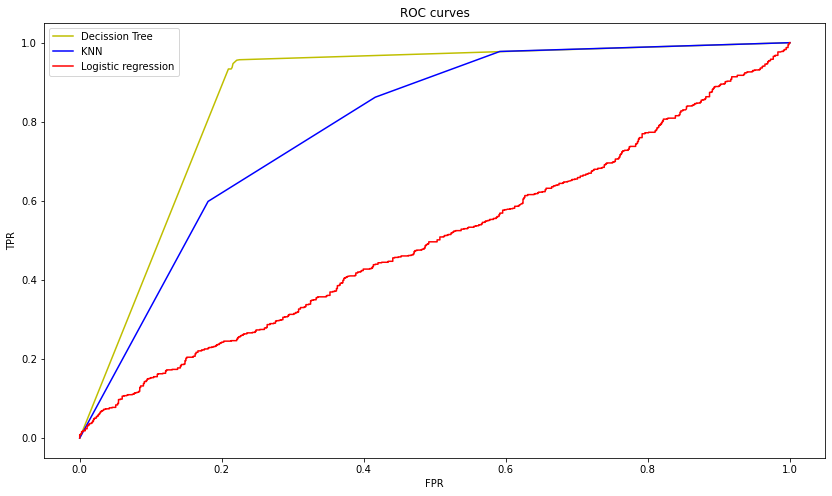

In [49]:
roc_curve(X_test, y_test)